1. The integration program for generic composite trapezoid rule is the `comp_trap`
    function in [`integrate.jl`](integrate.jl).

    The plot of the error is plotted [below](#Plot-$\dfrac{\pi}{3}$).

2. Plot of error is plotted [below](#Plot-$2\pi$). The error doesn't really show
    simple polynomial scaling before hitting the machine precision limit.

In [1]:
include("integrate.jl")
import Integrate

In [2]:
using PyPlot

In [3]:
immutable F1
end
call(::F1, x) = 1 ./ (5 / 4 - cos(x))

call (generic function with 1890 methods)

In [4]:
get_errors(expect, func, x0, x1, ns) =
    [abs(Integrate.comp_trap(func, linspace(x0, x1, n + 1)) - expect) for n in 1:ns]

get_errors (generic function with 1 method)

In [5]:
error1 = get_errors(8π / 9, F1(), 0, π / 3, 50);

#### Plot $\dfrac{\pi}{3}$

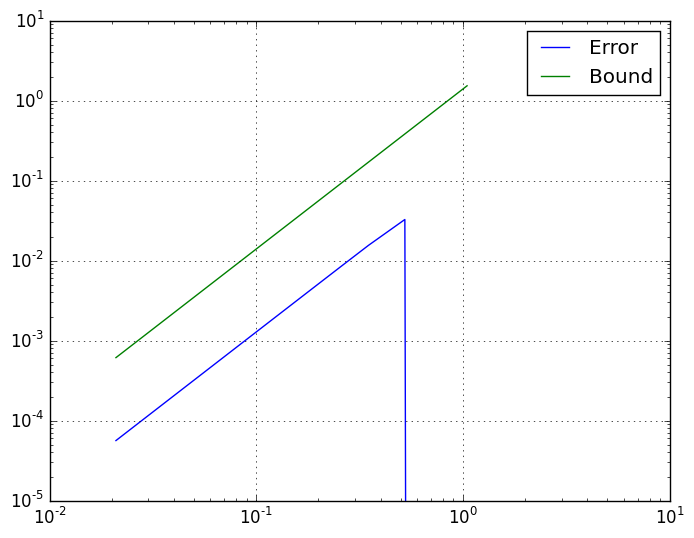

In [6]:
figure()

# f′ = -sin(x) / (5 / 4 - cos(x))^2
# f′′ = (-5 / 4 * cos(x) + 1 + sin^2(x)) / (5 / 4 - cos(x))^3
# max(abs(f′′)) = abs(f′′(0)) = 16

hs1 = π / 3 ./ (1:50)
bound1 = π / 36 * 16 * hs1.^2

gca()[:set_xscale]("log", nonposx="clip")
gca()[:set_yscale]("log", nonposy="clip")

plot(hs1, error1, label="Error")
plot(hs1, bound1, label="Bound")
legend()
grid()

In [7]:
error2 = get_errors(8π / 3, F1(), 0, 2π, 500);

#### Plot $2\pi$

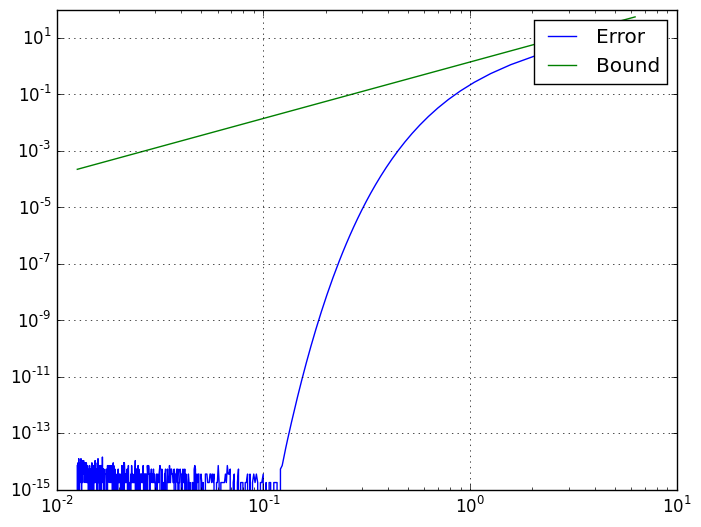

In [8]:
figure()

hs2 = 2π ./ (1:500)
bound2 = π / 36 * 16 * hs2.^2

gca()[:set_xscale]("log", nonposx="clip")
gca()[:set_yscale]("log", nonposy="clip")

plot(hs2, error2, label="Error")
plot(hs2, bound2, label="Bound")
legend()
grid()